# Does Stricter Gun Laws Help Reduce Firearm Mortality?

In this analysis, I will explore whether strict gun laws help reduce firearm mortality rate in each state. Using data taken from the CDC website, as well as data from the Giffords Law Center, I will compare the gun death rate with gun law grade as determined by the Giffords Law Center.  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import os
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon
import plot_likert
from sodapy import Socrata
import mapclassify
import textwrap
import altair as alt
import wget
import geopandas as gpd

## Importing Datasets

### CDC Dataset 

In [2]:
# Using Socrata API
client = Socrata("data.cdc.gov", None)
results = client.get("489q-934x", cause_of_death="Firearm-related injury")
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_alaska,rate_alabama,...,rate_age_1_4,rate_age_5_14,rate_age_15_24,rate_age_25_34,rate_age_35_44,rate_age_45_54,rate_age_55_64,rate_65_74,rate_age_75_84,rate_age_85_plus
0,2020 Q1,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",12,3.4,21.1,23,21.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Q1,3-month period,Firearm-related injury,Age-adjusted,"Deaths per 100,000",12.1,3.2,21.3,21.4,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020 Q2,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",12.3,3.4,21.6,22.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020 Q2,3-month period,Firearm-related injury,Age-adjusted,"Deaths per 100,000",13.1,3.7,22.9,20.2,23.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020 Q3,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",13,3.6,22.7,24.5,23.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020 Q3,3-month period,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.9,4.2,26,26.4,24.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020 Q4,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",13.6,3.8,23.8,23.5,23.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020 Q4,3-month period,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.3,4,25,26.1,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021 Q1,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14,4,24.4,23,24.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021 Q1,3-month period,Firearm-related injury,Age-adjusted,"Deaths per 100,000",13.6,4,23.4,19.4,26.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
results_df.columns

Index(['year_and_quarter', 'time_period', 'cause_of_death', 'rate_type',
       'unit', 'rate_overall', 'rate_sex_female', 'rate_sex_male',
       'rate_alaska', 'rate_alabama', 'rate_arkansas', 'rate_arizona',
       'rate_california', 'rate_colorado', 'rate_connecticut',
       'rate_district_of_columbia', 'rate_delaware', 'rate_florida',
       'rate_georgia', 'rate_hawaii', 'rate_iowa', 'rate_idaho',
       'rate_illinois', 'rate_indiana', 'rate_kansas', 'rate_kentucky',
       'rate_louisiana', 'rate_massachusetts', 'rate_maryland', 'rate_maine',
       'rate_michigan', 'rate_minnesota', 'rate_missouri', 'rate_mississippi',
       'rate_montana', 'rate_north_carolina', 'rate_north_dakota',
       'rate_nebraska', 'rate_new_hampshire', 'rate_new_jersey',
       'rate_new_mexico', 'rate_nevada', 'rate_new_york', 'rate_ohio',
       'rate_oklahoma', 'rate_oregon', 'rate_pennsylvania',
       'rate_rhode_island', 'rate_south_carolina', 'rate_south_dakota',
       'rate_tennessee', 'ra

In [5]:
new_df = pd.melt(results_df, id_vars=['year_and_quarter', 'time_period', 'rate_type'] ,value_vars=['rate_alaska',
        'rate_alabama', 'rate_arkansas', 'rate_arizona',
       'rate_california', 'rate_colorado', 'rate_connecticut',
       'rate_district_of_columbia', 'rate_delaware', 'rate_florida',
       'rate_georgia', 'rate_hawaii', 'rate_iowa', 'rate_idaho',
       'rate_illinois', 'rate_indiana', 'rate_kansas', 'rate_kentucky',
       'rate_louisiana', 'rate_massachusetts', 'rate_maryland', 'rate_maine',
       'rate_michigan', 'rate_minnesota', 'rate_missouri', 'rate_mississippi',
       'rate_montana', 'rate_north_carolina', 'rate_north_dakota',
       'rate_nebraska', 'rate_new_hampshire', 'rate_new_jersey',
       'rate_new_mexico', 'rate_nevada', 'rate_new_york', 'rate_ohio',
       'rate_oklahoma', 'rate_oregon', 'rate_pennsylvania',
       'rate_rhode_island', 'rate_south_carolina', 'rate_south_dakota',
       'rate_tennessee', 'rate_texas', 'rate_utah', 'rate_virginia',
       'rate_vermont', 'rate_washington', 'rate_wisconsin',
       'rate_west_virginia', 'rate_wyoming'], var_name='State', 
        value_name='Firearm_Mortality_Rate')

I used the most recent data available, which was the 12 month period ending in the 3rd quarter of 2022. Additionally, I chose to use age-adjusted rates. As per the Kaiser Family Foundation, "...since death rates are affected by the population composition of a given area, age-adjusted death rates should be used for comparisons between areas because they control for differences in population composition."

In [6]:
year_2022 = new_df[(new_df["year_and_quarter"] == "2022 Q3") & 
                   (new_df["rate_type"] == "Age-adjusted") &
                  (new_df["time_period"] == "12 months ending with quarter")].reset_index()
year_2022

,index,year_and_quarter,time_period,rate_type,State,Firearm_Mortality_Rate
0,20,2022 Q3,12 months ending with quarter,Age-adjusted,rate_alaska,23.8
1,68,2022 Q3,12 months ending with quarter,Age-adjusted,rate_alabama,26
2,116,2022 Q3,12 months ending with quarter,Age-adjusted,rate_arkansas,22.5
3,164,2022 Q3,12 months ending with quarter,Age-adjusted,rate_arizona,20.3
4,212,2022 Q3,12 months ending with quarter,Age-adjusted,rate_california,8.8
5,260,2022 Q3,12 months ending with quarter,Age-adjusted,rate_colorado,17.1
6,308,2022 Q3,12 months ending with quarter,Age-adjusted,rate_connecticut,6.8
7,356,2022 Q3,12 months ending with quarter,Age-adjusted,rate_district_of_columbia,25
8,404,2022 Q3,12 months ending with quarter,Age-adjusted,rate_delaware,12.7
9,452,2022 Q3,12 months ending with quarter,Age-adjusted,rate_florida,14.2


In [7]:
year_2022["State"] = year_2022["State"].str.replace('rate_', '').str.capitalize()
year_2022

,index,year_and_quarter,time_period,rate_type,State,Firearm_Mortality_Rate
0,20,2022 Q3,12 months ending with quarter,Age-adjusted,Alaska,23.8
1,68,2022 Q3,12 months ending with quarter,Age-adjusted,Alabama,26
2,116,2022 Q3,12 months ending with quarter,Age-adjusted,Arkansas,22.5
3,164,2022 Q3,12 months ending with quarter,Age-adjusted,Arizona,20.3
4,212,2022 Q3,12 months ending with quarter,Age-adjusted,California,8.8
5,260,2022 Q3,12 months ending with quarter,Age-adjusted,Colorado,17.1
6,308,2022 Q3,12 months ending with quarter,Age-adjusted,Connecticut,6.8
7,356,2022 Q3,12 months ending with quarter,Age-adjusted,District_of_columbia,25
8,404,2022 Q3,12 months ending with quarter,Age-adjusted,Delaware,12.7
9,452,2022 Q3,12 months ending with quarter,Age-adjusted,Florida,14.2


In [8]:
year_2022["State"].replace({"North_dakota": "North Dakota", 
                            "West_virginia": "West Virginia", 
                            "North_carolina": "North Carolina", 
                            "South_dakota": "South Dakota", 
                            "South_carolina": "South Carolina", 
                            "District_of_columbia": "District of Columbia", 
                            "New_mexico": "New Mexico", 
                            "Rhode_island": "Rhode Island", 
                            "New_jersey": "New Jersey", 
                            "New_york": "New York", 
                            "New_hampshire": "New Hampshire" }, inplace=True)

In [9]:
year_2022.Firearm_Mortality_Rate = year_2022.Firearm_Mortality_Rate.astype('float')

### Gun Law Dataset From Giffords Law Center

In [10]:
# downloaded scorecard from Giffords Law Center Website
scorecard = pd.read_html("https://giffords.org/lawcenter/resources/scorecard/")

In [11]:
scorecard = scorecard[0]

In [12]:
scorecard

,Gun Law Strength (Ranked),State,Grade,Gun Death Rate (Ranked),Gun Death Rate (per 100K)
0,38,Alabama,F,4,26.4
1,41,Alaska,F,6,25.2
2,42,Arizona,F,17,18.3
3,50,Arkansas,F,8,23.3
4,1,California,A,43,9.0
5,14,Colorado,B,18,17.8
6,3,Connecticut,A-,45,6.7
7,13,Delaware,B,23,16.6
8,23,Florida,C-,34,14.1
9,34,Georgia,F,14,20.3


In [13]:
scorecard.drop(scorecard.index[-1], inplace=True)

In [14]:
scorecard.rename(columns={"Gun Death Rate  (per 100K)": "Gun_Death_Rate_per_100K", 
                          "Gun Law Strength  (Ranked)": "State_Rank_Gun_Law_Strength", 
                          "Gun Death Rate  (Ranked)": "State_Rank_Gun_Deaths"}, inplace=True)

In [15]:
scorecard.Gun_Death_Rate_per_100K = scorecard.Gun_Death_Rate_per_100K.astype('float')

In [16]:
scorecard.State_Rank_Gun_Law_Strength = scorecard.State_Rank_Gun_Law_Strength.astype('int')
scorecard.State_Rank_Gun_Deaths = scorecard.State_Rank_Gun_Deaths.astype('int')

I removed the '+' and '-' for each grade in order to have columns that are specifically A to F grades. This will be the basis for creating the Likert Scale:

In [17]:
scorecard["Grade"] = scorecard["Grade"].str.replace('+', '')
scorecard

,State_Rank_Gun_Law_Strength,State,Grade,State_Rank_Gun_Deaths,Gun_Death_Rate_per_100K
0,38,Alabama,F,4,26.4
1,41,Alaska,F,6,25.2
2,42,Arizona,F,17,18.3
3,50,Arkansas,F,8,23.3
4,1,California,A,43,9.0
5,14,Colorado,B,18,17.8
6,3,Connecticut,A-,45,6.7
7,13,Delaware,B,23,16.6
8,23,Florida,C-,34,14.1
9,34,Georgia,F,14,20.3


In [18]:
scorecard["Grade"] = scorecard["Grade"].str.replace('-', '')
scorecard

,State_Rank_Gun_Law_Strength,State,Grade,State_Rank_Gun_Deaths,Gun_Death_Rate_per_100K
0,38,Alabama,F,4,26.4
1,41,Alaska,F,6,25.2
2,42,Arizona,F,17,18.3
3,50,Arkansas,F,8,23.3
4,1,California,A,43,9.0
5,14,Colorado,B,18,17.8
6,3,Connecticut,A,45,6.7
7,13,Delaware,B,23,16.6
8,23,Florida,C,34,14.1
9,34,Georgia,F,14,20.3


### Importing Zip File of Geo Information of United States

In [19]:
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

'cb_2018_us_state_500k (7).zip'

In [20]:
gdf = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k.zip')

In [21]:
gdf

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


## Merging CDC with Geo Information of U.S. State Map

In [22]:
gdf_cdc = gdf.merge(year_2022,left_on='NAME',right_on='State')

## Merging Scorecard

In [23]:
gdf_scorecard = gdf.merge(scorecard,left_on='NAME',right_on='State')

## Likert Scale

I used the letter grades given to each state as a basis for the Likert Scale:

In [25]:
def categorise(row):  
    if row['Grade'] == 'A':
        return '1'
    elif row['Grade'] == 'B':
        return '2'
    elif row['Grade'] == 'C':
        return '3'
    elif row['Grade'] == 'D':
        return '4'
    else:
        return '5'

In [26]:
gdf_scorecard['Likert_Scale'] = gdf_scorecard.apply(lambda row: categorise(row), axis=1)

In [27]:
min_likert = min(gdf_scorecard["Likert_Scale"])
max_likert = max(gdf_scorecard["Likert_Scale"])

In [28]:
gdf_scorecard.Likert_Scale = gdf_scorecard.Likert_Scale.astype('int')

In [29]:
gdf_scorecard

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State_Rank_Gun_Law_Strength,State,Grade,State_Rank_Gun_Deaths,Gun_Death_Rate_per_100K,Likert_Scale
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",45,Mississippi,F,1,33.9,5
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",21,North Carolina,C,21,17.3,3
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",34,Oklahoma,F,12,21.2,5
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",12,Virginia,B,32,14.3,2
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",36,West Virginia,F,19,17.3,5
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",32,Louisiana,F,2,29.1,5
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",16,Michigan,C,28,15.4,3
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",6,Massachusetts,A,50,3.4,1
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",48,Idaho,F,25,16.3,5
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",23,Florida,C,34,14.1,3


## Heatmap of Likert Scale and Firearm Mortality Rate

Using files from the Census Bureau, I created a map of the U.S., while also constructing the states of Alaska and Hawaii:

### Likert Scale Heatmap

<Axes: >

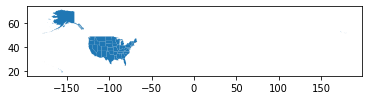

In [30]:
gdf_scorecard.plot()

In [31]:
alaska_gdf2 = gdf_scorecard[gdf_scorecard.STUSPS=='AK']

In [32]:
hawaii_gdf2 = gdf_scorecard[gdf_scorecard.STUSPS=='HI']

<Axes: >

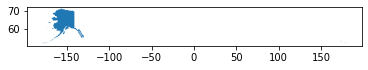

In [33]:
alaska_gdf2.plot()

<ipython-input-34-805ef6d87cf2>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


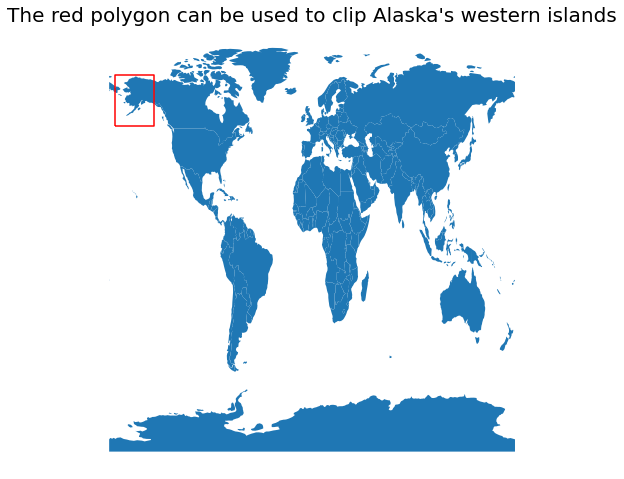

In [34]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))



# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
# polygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_title("The red polygon can be used to clip Alaska's western islands", fontsize=20)
ax1.set_axis_off()
plt.show()

<Axes: >

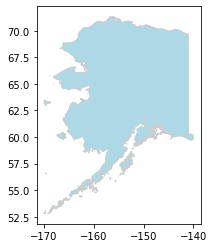

In [35]:
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
# apply1(alaska_gdf,0,36)
alaska_gdf2.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')
# alaska_gdf.clip(polygon).plot(column=variable, cmap = colormap, linewidth=0.8,ax=akax, edgecolor='0

<Axes: >

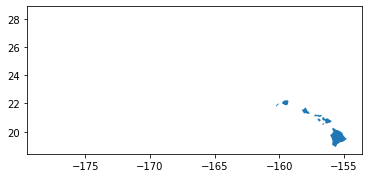

In [36]:
hawaii_gdf2.plot()

<Axes: >

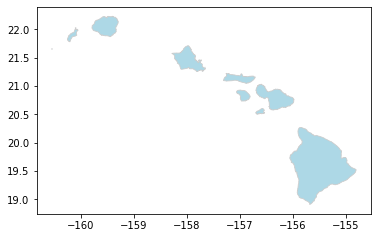

In [37]:
hipolygon = Polygon([(-161,0),(-161,90),(-120,90),(-120,0)])
hawaii_gdf2.clip(hipolygon).plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


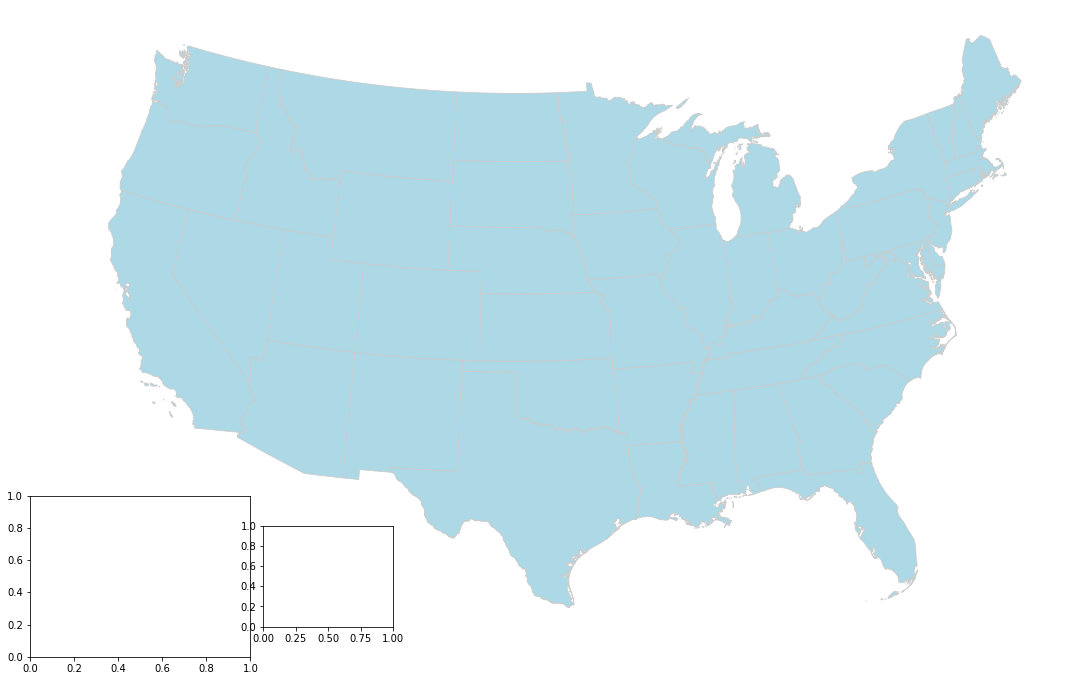

In [38]:
# Create a "copy" of gdf for re-projecting
visframe = gdf_scorecard.to_crs({'init':'epsg:2163'})

# create figure and axes for with Matplotlib for main map
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box from the main map
ax.axis('off')


# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Alaska Axis (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   


# Add Hawaii Axis(x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   

# We'll later map Alaska in "akax" and Hawaii in "hiax"

In [39]:
# Apply this the gdf to ensure that all states are assigned colors by the same function
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.coolwarm)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


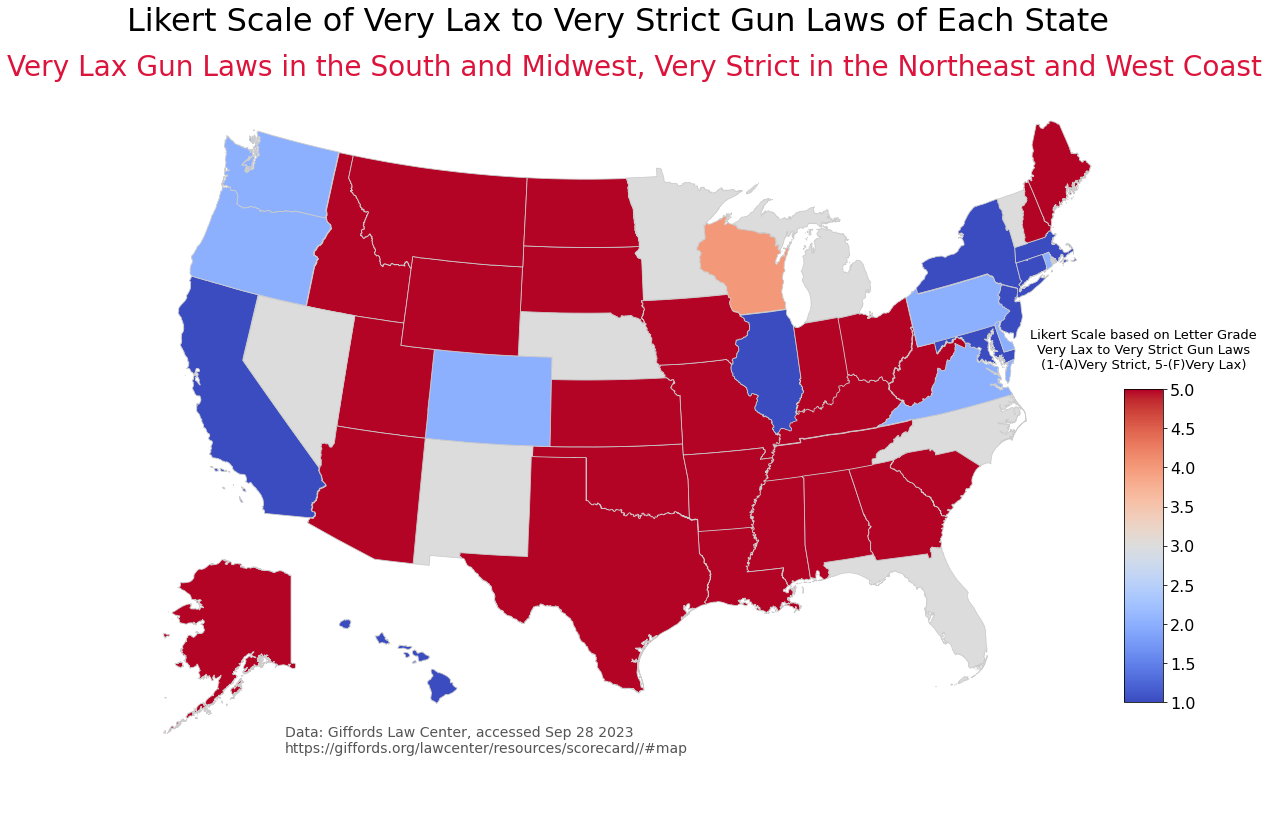

In [40]:
# **************************
# set the value column that will be visualised
variable = 'Likert_Scale'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf_scorecard.Likert_Scale.min(), gdf_scorecard.Likert_Scale.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "coolwarm"
gdf = makeColorColumn(gdf_scorecard,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163
visframe = gdf_scorecard.to_crs({'init':'epsg:2163'})



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# set the font for the visualization to Helvetica
hfont = {'fontname':'sans-serif'}

# add a title and annotation
title_string = "Likert Scale of Very Lax to Very Strict Gun Laws of Each State"
subtitle_string = "Very Lax Gun Laws in the South and Midwest, Very Strict in the Northeast and West Coast"

plt.suptitle(title_string, y=0.9, fontsize=32)
plt.title(subtitle_string, **hfont, fontdict={'fontsize': '28', 'fontweight' : '1'}, color="crimson")

#ax.set_title('Gun Death Rate per 100K\n(12-month period as of 3rd Quarter 2022)\n High Rates in the South, Low Rates in the Northeast and West Coast', **hfont, fontdict={'fontsize': '32', 'fontweight' : '1'})
#ax.set_title('High Rates in the South, Low Rates in the Northeast and West Coast')


# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Likert Scale based on Letter Grade\nVery Lax to Very Strict Gun Laws\n(1-(A)Very Strict, 5-(F)Very Lax)\n', **hfont, fontdict={'fontsize': '13', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Data: Giffords Law Center, accessed Sep 28 2023\nhttps://giffords.org/lawcenter/resources/scorecard//#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.STUSPS not in ['AK','HI']:
        vf = visframe[visframe.STUSPS==row.STUSPS]
        c = gdf_scorecard[gdf_scorecard.STUSPS==row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf_scorecard[gdf_scorecard.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf_scorecard.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf_scorecard[gdf_scorecard.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8');

#for i in range(len(gdf2)):
    #plt.text(gdf2.geometry[i],gdf2.geometry[i],"{}\n{}".format(gdf2.state[i],gdf2.State_Rank_Gun_Deaths[i]),size=30)




### Heatmap of Firearm Mortality Rate

In [41]:
# Apply this the gdf to ensure that all states are assigned colors by the same function
def makeColorColumn2(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.coolwarm)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


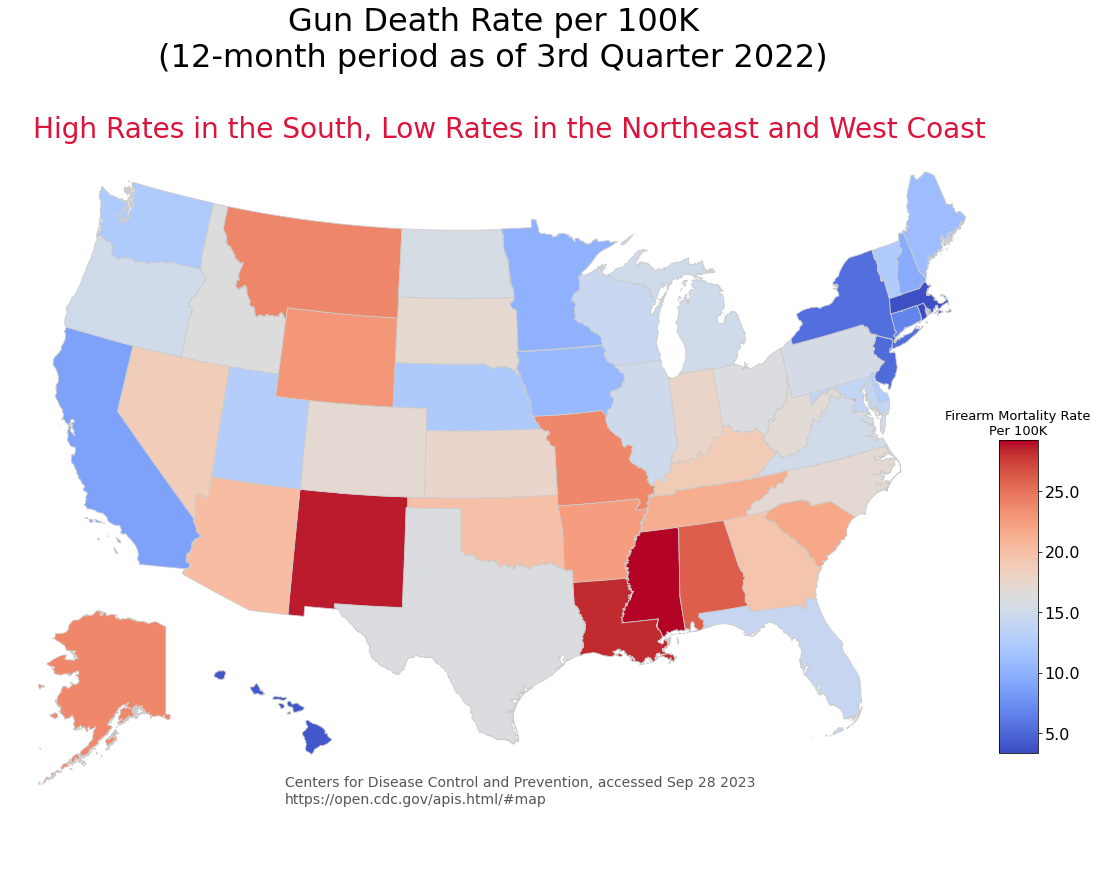

In [42]:
# **************************
# set the value column that will be visualised
variable = 'Firearm_Mortality_Rate'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf_cdc.Firearm_Mortality_Rate.min(), gdf_cdc.Firearm_Mortality_Rate.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "coolwarm"
gdf = makeColorColumn2(gdf_cdc,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163
visframe = gdf_cdc.to_crs({'init':'epsg:2163'})



# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# set the font for the visualization to Helvetica
hfont = {'fontname':'sans-serif'}

# add a title and annotation
title_string = "Gun Death Rate per 100K\n(12-month period as of 3rd Quarter 2022)"
subtitle_string = "High Rates in the South, Low Rates in the Northeast and West Coast"

plt.suptitle(title_string, y=0.95, fontsize=32)
plt.title(subtitle_string, **hfont, fontdict={'fontsize': '28', 'fontweight' : '1'}, color="crimson")

#ax.set_title('Gun Death Rate per 100K\n(12-month period as of 3rd Quarter 2022)\n High Rates in the South, Low Rates in the Northeast and West Coast', **hfont, fontdict={'fontsize': '32', 'fontweight' : '1'})
#ax.set_title('High Rates in the South, Low Rates in the Northeast and West Coast')


# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Firearm Mortality Rate\nPer 100K', **hfont, fontdict={'fontsize': '13', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Centers for Disease Control and Prevention, accessed Sep 28 2023\nhttps://open.cdc.gov/apis.html/#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.STUSPS not in ['AK','HI']:
        vf = visframe[visframe.STUSPS==row.STUSPS]
        c = gdf_cdc[gdf_cdc.STUSPS==row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf_cdc[gdf_cdc.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf_cdc.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf_cdc[gdf_cdc.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8');

#for i in range(len(gdf2)):
    #plt.text(gdf2.geometry[i],gdf2.geometry[i],"{}\n{}".format(gdf2.state[i],gdf2.State_Rank_Gun_Deaths[i]),size=30)



## Findings

* States in the Northeast and West Coast had low firearm mortality rates, while states in the Southeast and in parts of the Midwest had high gun death rates.
* States classified as having very strict gun laws and given A grades were primarily in the Northeast, with California, Hawaii, and Illinois also receiving high marks. 
* States classified as having very lax gun laws and given F grades were primarily in the South and Midwest.
* New Mexico had a moderate rating, but has a high gun death rate.
* Utah was given an F rating, but its firearm mortality rate was not significantly high as the other states that have very lax gun laws.

## Next Steps

* Conduct analysis using updated data.
* Break down of types of firearm deaths (homicide, suicide, accidental).
* Compare firearm deaths in U.S. with other countries.

## References

https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

https://giffords.org/lawcenter/gun-laws/browse-gun-laws-by-state/

https://giffords.org/lawcenter/resources/scorecard/

https://everytownresearch.org/rankings/

https://everytownresearch.org/rankings/methodology/

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html?source=post_page-----73b10dcd4b4b--------------------------------

https://github.com/alexF3/map_us_hunger/blob/main/Python_mapping_tutorial.ipynb

https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6